In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [64]:
df=pd.read_csv('car-mpg.csv')

In [65]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [66]:
df.shape

(398, 9)

In [67]:
df.drop(columns='car_name',inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null object
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [69]:
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [70]:
{i for i in df.hp if(not (str(i).isdigit()))}

{'?'}

In [71]:
df.hp.replace('?',np.nan,inplace=True)

In [72]:
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        6
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [73]:
df.dropna(inplace=True)

In [74]:
df.hp=df.hp.astype('float64')

In [75]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


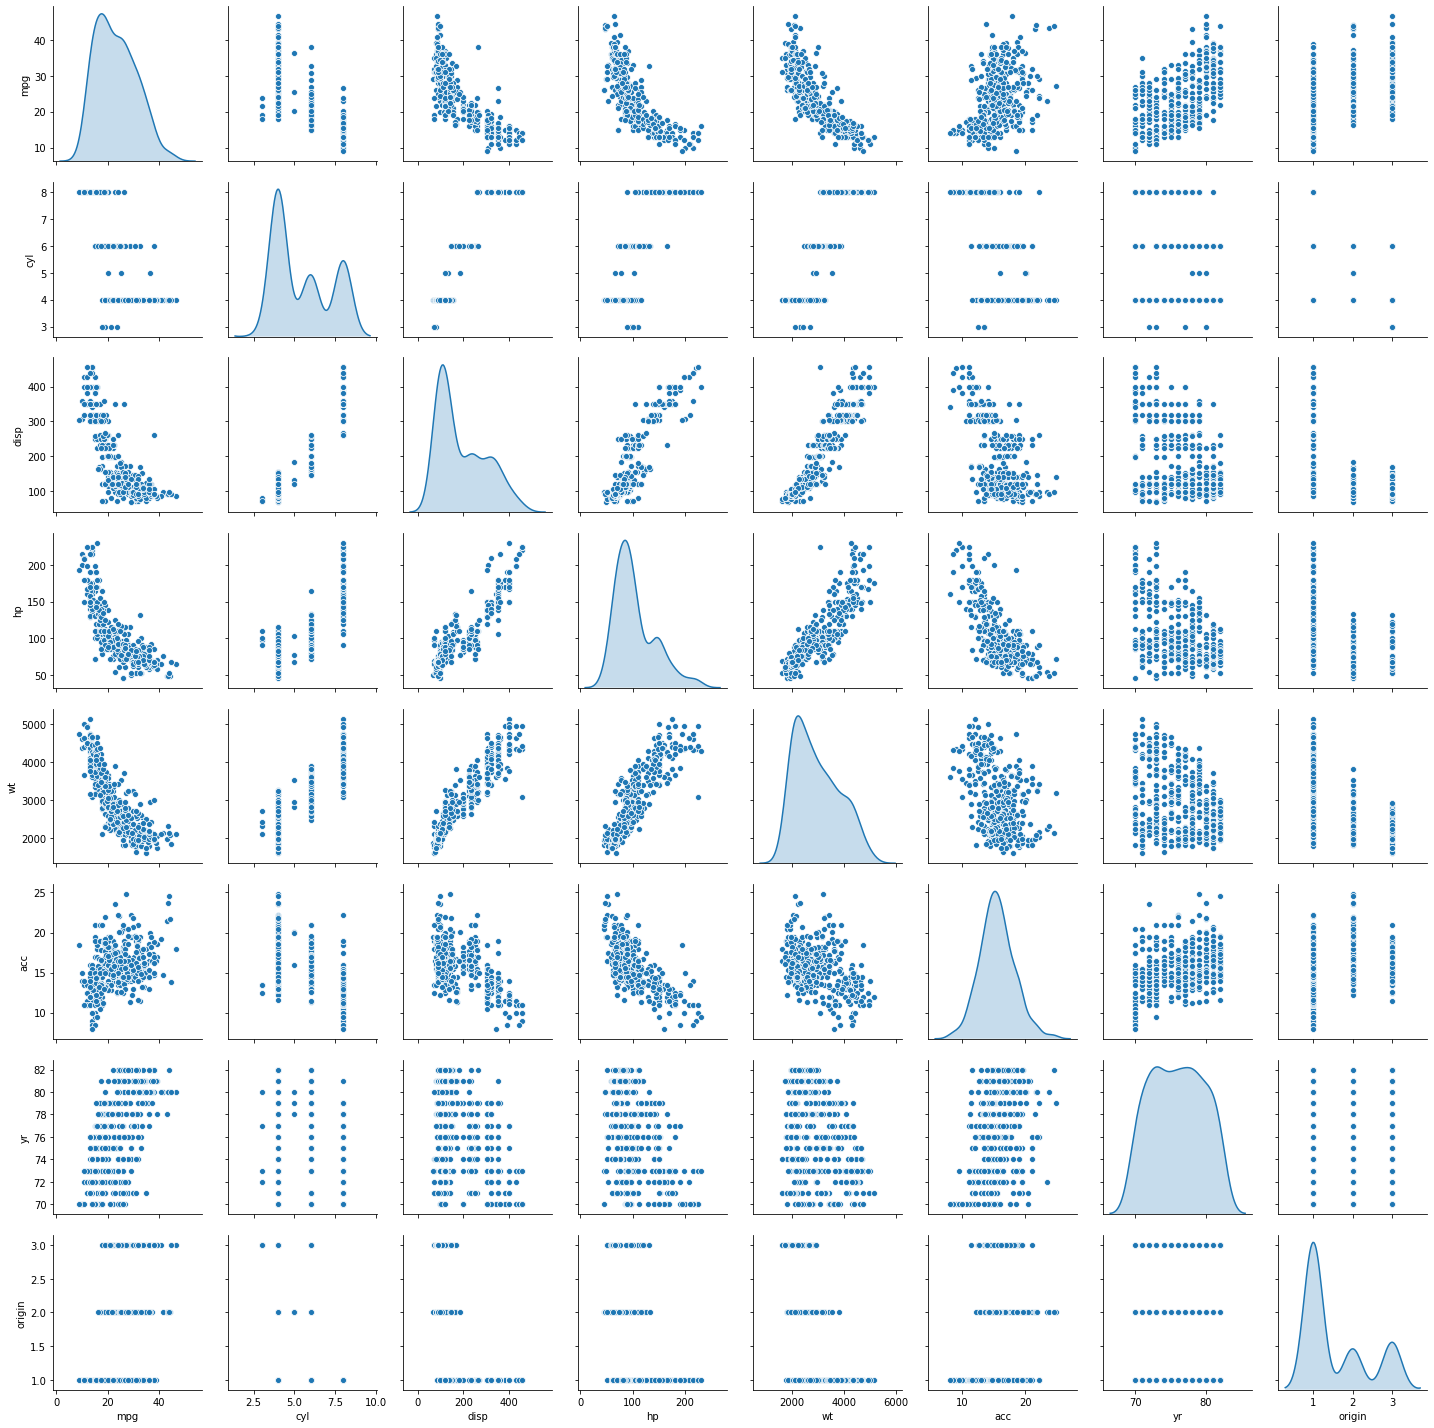

In [396]:
sns.pairplot(df,diag_kind='kde')
plt.show()

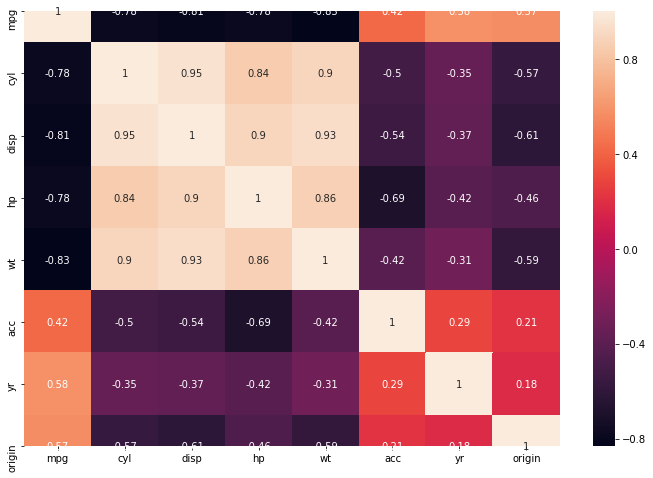

In [399]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here as we observe that there is high multicollinearity in the data. So we have to use filter method or feature selection using vif to select some features that are least correlated with each other and high correlated with the target.

In [179]:
X=df.drop(columns='mpg')
y=df.mpg

In [180]:
thresh=10
for i in range(X.shape[1]):
    vif=[variance_inflation_factor(X.values,j)for j in range(X.shape[1])]
    a=np.argmax(vif)
    if(vif[a]<=thresh):
        break
    else:
        X=X.drop(X.columns[a],axis=1)
X.head()

,disp,acc,origin
0,307.0,12.0,1
1,350.0,11.5,1
2,318.0,11.0,1
3,304.0,12.0,1
4,302.0,10.5,1


# Fittig OLS

In [181]:
from statsmodels.api import OLS,add_constant

X_constant=add_constant(X)
model=OLS(y,X_constant).fit()

In [182]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     246.9
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.41e-89
Time:                        04:47:06   Log-Likelihood:                -1151.9
No. Observations:                 392   AIC:                             2312.
Df Residuals:                     388   BIC:                             2328.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4464      2.289     14.175      0.000      27.946      36.947
disp          -0.0549      0.003    -16.476      0.000      -0.061      -0.048
acc           -0.0031      0.102     -0.031      0.975      -0.204       0.198
origin         1.0944      0.372      2.943      0.003       0.363       1.826
==============================================================================
Omnibus:                       37.705   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.050
Skew:                           0.615   Prob(JB):                     3.36e-14
Kurtosis:                       4.512   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
X.drop(columns='acc',inplace=True)

# Test for Assumptions

## 1.Check for auto correlation

##### Here Durbin-Watson constant value is 1.078 that means it is a positive auto correlation

In [81]:
# residuals
residuals=model.resid

In [82]:
import statsmodels.tsa.api as smt

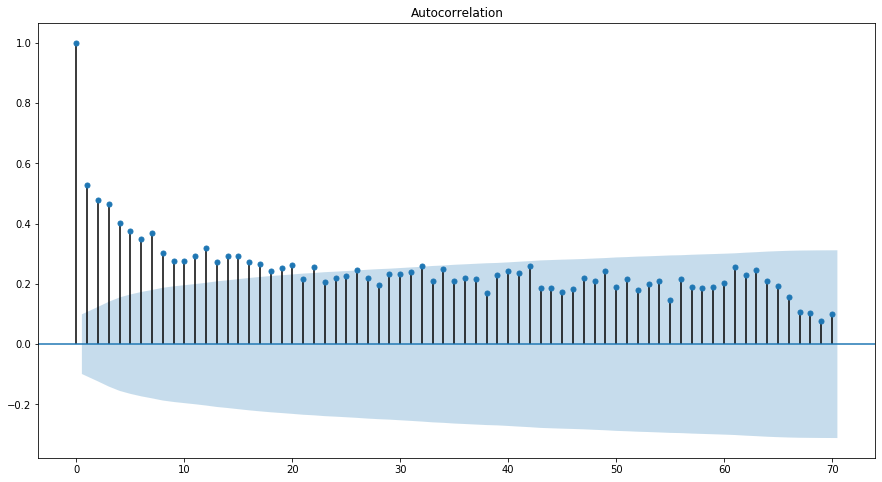

In [83]:
fig,ax=plt.subplots(figsize=(15,8))
smt.graphics.plot_acf(residuals,lags=70,ax=ax)
plt.show()
# lags here defines the number of entries

In [84]:
# as we see here there is no cyclic pattern in the graph so we can conclude that there is no auto correlation

## 2.Normality of residuals



In [85]:
residuals=model.resid

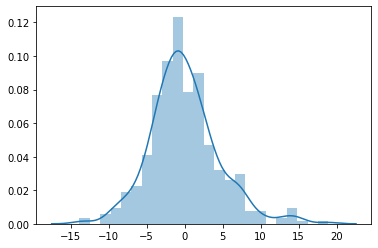

In [86]:
sns.distplot(residuals)
plt.show()

In [87]:
residuals.skew()

0.6175150095041267

In [88]:
stats.shapiro(residuals)

(0.9717243313789368, 6.646692440881452e-07)

In [89]:
residuals.kurt()

1.5466694640579828

In [90]:
# Test for normallity

In [91]:
# JB constant
stats.jarque_bera(residuals)

(62.05046238691367, 3.352873534367973e-14)

Not normally distributed.

## Linearity of residuals

In [92]:
# 1st method
residuals.mean()

8.153115371043191e-14

In [93]:
# not perfectly normal

In [94]:
#2nd method

# reg plot between observed and predicted

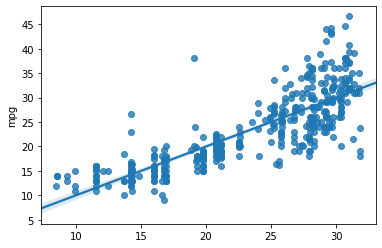

In [95]:
sns.regplot(x=model.predict(X_constant),y=y)
plt.show()

In [96]:
#3rd method

# reg plot between residuals vs predicted

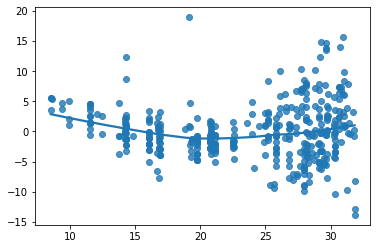

In [97]:
sns.regplot(model.predict(X_constant),residuals,lowess=True)
plt.show()
#not perfectlly normal

### Rainbow test for linearity

In [98]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)
# as p_ value is less than alpha so we reject null
# so our  data is not linear

(2.3248658924154393, 3.837488692667283e-09)

## 4.Homoscedasticity  and hetroscedasticity

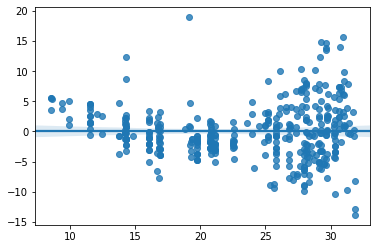

In [99]:
sns.regplot(model.predict(X_constant),residuals)
plt.show()

### Gold feld Test or Beusch Wagon Test

1. Ho: variance is constant (data is homoscedasticity)
2. H1: variance is not constant (data is hetroscedasticity)

In [100]:
import statsmodels.stats.api as sms

In [101]:
sms.het_goldfeldquandt(model.resid,model.model.exog)

(3.3143240929430604, 3.7690488187363934e-16, 'increasing')

In [102]:
sms.het_goldfeldquandt(model.resid,X_constant)

(3.3143240929430604, 3.7690488187363934e-16, 'increasing')

In [103]:
# exog is your features(input) = x
# endog is your target = y_predict

In [104]:
# we reject null as p value is less than alpha

## 5. Multi collinearity

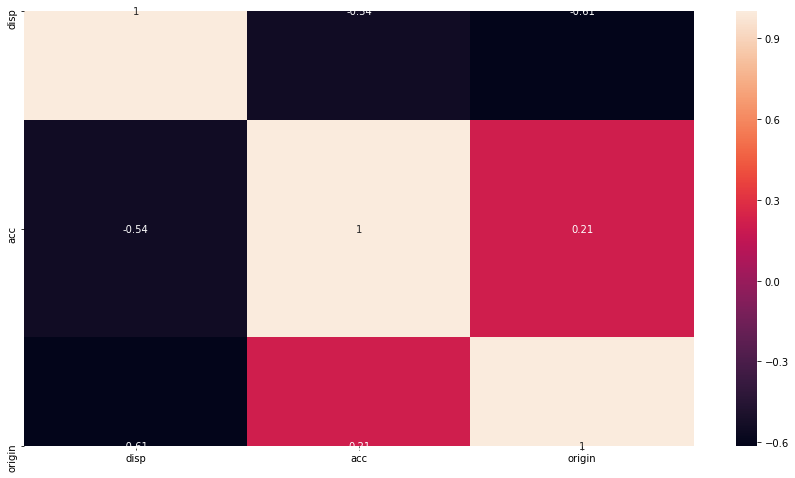

In [105]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(X.corr(),annot=True,ax=ax)
plt.show()

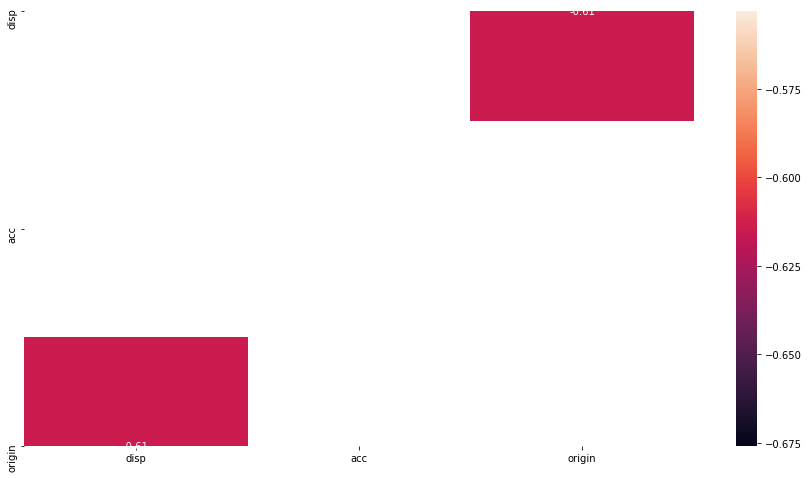

In [106]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(X.corr()[(abs(X.corr())>0.6)&(abs(X.corr())!=1)],annot=True,ax=ax)
plt.show()

## Variance inflation factor test

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [109]:
pd.Series(index=X.columns,data=vif)

disp      3.452480
acc       9.873896
origin    5.564724
dtype: float64

In [157]:
X=df[['disp']]
y=df['mpg']

In [184]:
#Train_test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [185]:
# Scaling Data using Standard Scaler to avoid any error during optimization of coefficients.

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Linear Regression Implementation from scratch using:
1. Normal Equation 
2. Gradient Descent

    i)  . Batch Gradient Descent 
    
    ii) . Stochastic Gradient Descent
    
    iii). Mini Batch Gradient Descent

## 1. Normal Equation 

Theta= (X^T.X)^-1 .X^T.y

This minimizes our cost fuction and returns the Theta or Coefficients for each feature.

In [186]:
def Normal_Equation(X,y):
    ''' Input: X,y
    Returns: Intercept,Coef
    '''
    
    data=pd.DataFrame(X)
    data.insert(0,'Constant',np.ones(data.shape[0],dtype='int'))
    theta=np.linalg.inv(data.T.dot(data)).dot(data.T).dot(y)
    return(theta[0],theta[1:])
    

In [187]:
intercept,coef=Normal_Equation(X_train_scaled,y_train)
print(f'Intercept {intercept},\nCoef {coef}')

Intercept 23.637591240875913,
Coef [-6.00014455  0.86570192]


In [188]:
# Coefficients of each column
theta_normal=list(coef)
theta_normal.insert(0,intercept)
columns=X_train.columns.tolist()
columns.insert(0,'Intercept')
pd.Series(theta_normal,index=columns)

Intercept    23.637591
disp         -6.000145
origin        0.865702
dtype: float64

In [189]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.coef_,lr.intercept_

(array([-6.00014455,  0.86570192]), 23.637591240875913)

Let's make predictions and calculate R^2 value

In [190]:
def R2_score(X,y,intercept,coef,Root_Mean_Squared_Error=True):
    y_pred=intercept+X.dot(coef)
    SSE=sum((y-y_pred)**2)      # Sum of Squared Error (Residuals)
    SST=sum((y-y.mean())**2)    # Sum of Squared Total
    r2_score=1-SSE/SST
    if Root_Mean_Squared_Error:
        rmse=np.sqrt(sum((y-y_pred)**2)/len(X))
        return r2_score,rmse
    else:
        return r2_score
        
    

In [191]:
r2_score,rmse=R2_score(X_test_scaled,y_test,intercept,coef)
print(f'R2 Score {r2_score} \nRoot Mean Squared Error {rmse}')

R2 Score 0.5901056546505938 
Root Mean Squared Error 4.656757517061923


# 2. Gradient Descent 

## 2.1 Batch Gradient Descent

In [211]:
def Batch_GD(X,y,eta=0.001,max_iter=10000,ep=0.00001):
    
    intercept=np.random.random(1)
    coef=np.random.random(X_train.shape[1])                #Random Initialization of thetas
    
    m=len(X)                                      # Number of elements in X
    data=np.array(X)
    mse=float('inf')                              # Mean Squred Error
    
    # Performing Gradient Descent
    
    iter=0
    while True:
        y_pred=intercept+data.dot(coef)
        error=sum((y_pred-y)**2)/m
        if(abs(error-mse)<=ep):
            print(f'Converged at iteration: {iter}')
            break
            
        iter+=1
        if(iter==max_iter):
            print('Max iterations reached')
            print(f'Cost function difference {abs(error-mse)}')
            break
        mse=error          #update error

        gradient=np.array([(2/m)*sum((y_pred-y)*data[:,j]) for j in range(data.shape[1])])
        gradient0=((2/m)*sum((y_pred-y)))
        
        coef=coef-eta*gradient
        intercept=intercept-eta*gradient0
    return(intercept,coef)


In [212]:
intercept_batch,coef_batch=Batch_GD(X_train_scaled,y_train)

Converged at iteration: 4714


In [213]:
# Coefficients of each column
theta_batch=list(coef_batch)
theta_batch.insert(0,intercept_batch[0])
columns=X_train.columns.tolist()
columns.insert(0,'Intercept')
pd.Series(theta_batch,index=columns)

Intercept    23.635744
disp         -5.907309
origin        0.958536
dtype: float64

In [214]:
r2_score,rmse=R2_score(X_test_scaled,y_test,intercept_batch,coef_batch)
print(f'R2 Score {r2_score} \nRoot Mean Squared Error {rmse}')

R2 Score 0.5916165322845033 
Root Mean Squared Error 4.6481671493887555


## 2.2 Stochastic Gradient Descent

In [215]:
def Stochastic_GD(X,y,n_epoch=50,ls0=5,ls1=50):
    
    m=len(X)
    data=np.array(X)
    Y=np.array(y)

    learning_schedule=lambda ls: ls0/(ls+ls1)             # Simple Leaarning Schedule

    coef=np.random.random(data.shape[1])
    intercept=np.random.randn(1)                          # Random Theta initialisation

    for epoch in range(n_epoch):
        for i in range(m):
            random_index=np.random.randint(m)
            xi=data[random_index:random_index+1]
            yi=Y[random_index:random_index+1]
        
            error=intercept+xi.dot(coef)-yi
        
            gradient=np.array([2*sum(error*xi[:,j]) for j in range(xi.shape[1])])
            gradient0=(2*sum(error))
        
            eta=learning_schedule(epoch*m+i)            #Learning Rate is calculated in each ieration using simple Learing Schedule
            intercept=intercept-eta*gradient0
            coef=coef-eta*gradient
    return(intercept,coef)

In [216]:
intercept_SGD,coef_SGD=Stochastic_GD(X_train_scaled,y_train)

In [217]:
# Coefficients of each column
theta_SGD=list(coef_SGD)
theta_SGD.insert(0,intercept_SGD[0])
columns=X_train.columns.tolist()
columns.insert(0,'Intercept')
pd.Series(theta_SGD,index=columns)

Intercept    23.507026
disp         -6.091888
origin        0.799785
dtype: float64

In [218]:
r2_score,rmse=R2_score(X_test_scaled,y_test,intercept_SGD,coef_SGD)
print(f'R2 Score {r2_score} \nRoot Mean Squared Error {rmse}')

R2 Score 0.5932168362937306 
Root Mean Squared Error 4.639050984569571


## 2.3 Mini Batch Gradient Descent

In [219]:
def MiniBatch_GD(X,y,n_epoch=10000,eta=0.001,):
    m=len(X)
    data=np.array(X)
    Y=np.array(y)

    #Random initialisation of theta
    intercept=np.random.random(1)
    coef=np.random.random(data.shape[1])
    

    # Performing Mini Batch Gradient Descent
    for i in range(n_epoch):
        random_index=np.random.randint(0,m,int(m/3))  
        
    
        xi=data[random_index]
        yi=Y[random_index]
        
    
        y_pred=intercept+xi.dot(coef)
    
        error=y_pred-yi
        gradient=np.array([(2/len(xi))*sum(error*xi[:,j]) for j in range(xi.shape[1])])
        gradient0=(2/len(xi)*sum(error))
        
        coef=coef-eta*gradient
        intercept=intercept-eta*gradient0
    return(intercept,coef)

In [220]:
intercept_MiniGD,coef_MiniGD=MiniBatch_GD(X_train_scaled,y_train)

In [221]:
# Coefficients of each column
theta_MiniGD=list(coef_MiniGD)
theta_MiniGD.insert(0,intercept_MiniGD[0])
columns=X_train.columns.tolist()
columns.insert(0,'Intercept')
pd.Series(theta_MiniGD,index=columns)

Intercept    23.634344
disp         -5.983445
origin        0.909083
dtype: float64

In [222]:
r2_score,rmse=R2_score(X_test_scaled,y_test,intercept_MiniGD,coef_MiniGD)
print(f'R2 Score {r2_score} \nRoot Mean Squared Error {rmse}')

R2 Score 0.589945875923624 
Root Mean Squared Error 4.657665041527479
